# ****Random Forest**** #


### Dataset Description: ###

Use the Glass dataset and apply the Random forest model.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df=pd.read_excel("F:\DATA SCIENCE_ExcelR\Assignments\Random Forest\glass.xlsx",sheet_name=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
df.shape

(214, 10)

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

all are numeric but type is categorical variable

### 1. Exploratory Data Analysis (EDA): ###

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, inconsistencies in the data.

In [23]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

no null values

In [26]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### 2: Data Visualization: ###

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

Type: Type of glass: (class attribute)

 1 -- building_windows_float_processed

 2 --building_windows_non_float_processed

 3 --vehicle_windows_float_processed

 4 --vehicle_windows_non_float_processed (none in this database)

 5 --containers

 6 --tableware

 7 --headlamps


In [29]:
df["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

we use glass more in type2 and less in type6

seprating the numerical columns

In [37]:
num_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
if 'Type' in num_columns:
    num_columns.remove('Type')

In [39]:
num_columns

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# count plot for type

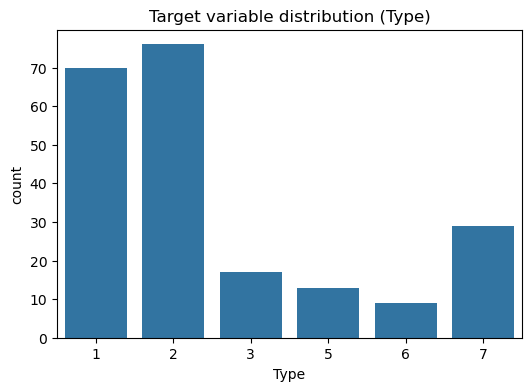

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title("Target variable distribution (Type)")
plt.show()

# histogram and skewness

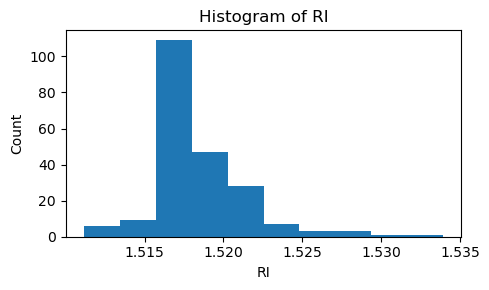

Skewness of RI is 1.6254305060087644
--------------------------------------------------------------------------


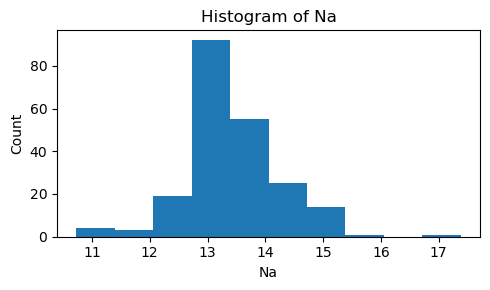

Skewness of Na is 0.4541814536577495
--------------------------------------------------------------------------


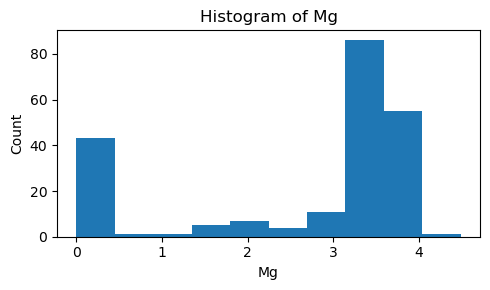

Skewness of Mg is -1.1525593175802356
--------------------------------------------------------------------------


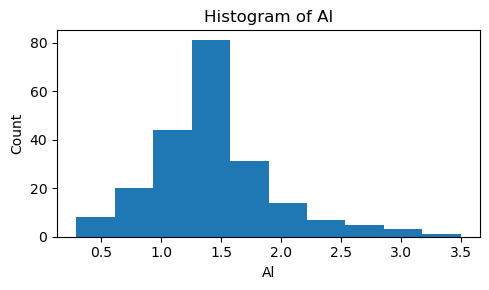

Skewness of Al is 0.9072898090246346
--------------------------------------------------------------------------


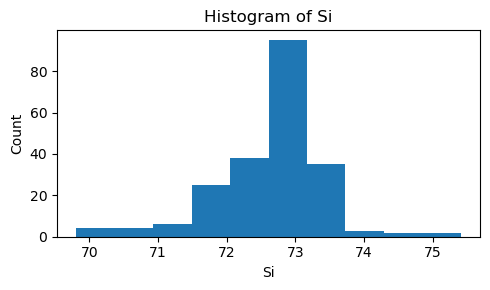

Skewness of Si is -0.7304472251318588
--------------------------------------------------------------------------


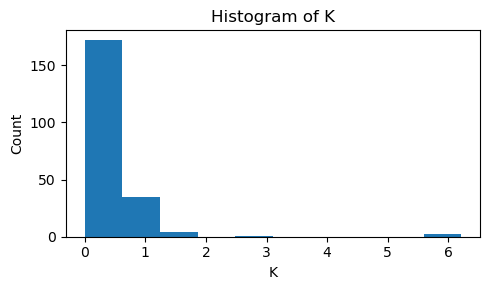

Skewness of K is 6.55164830960496
--------------------------------------------------------------------------


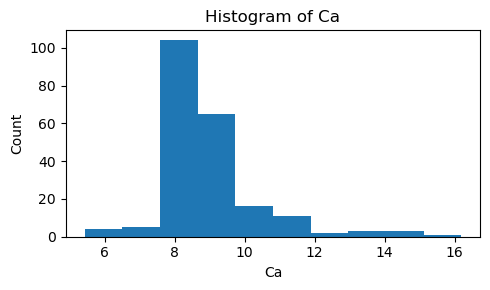

Skewness of Ca is 2.0470539131183103
--------------------------------------------------------------------------


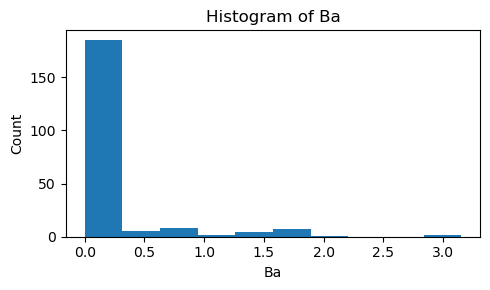

Skewness of Ba is 3.4164245693025577
--------------------------------------------------------------------------


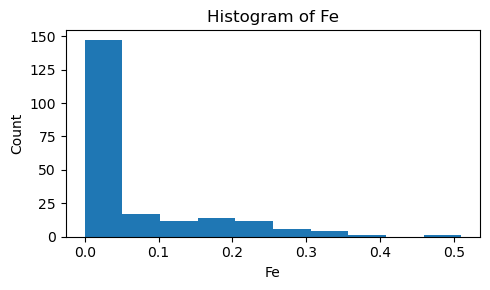

Skewness of Fe is 1.754327470435831
--------------------------------------------------------------------------


In [46]:
for col in num_columns:
    plt.figure(figsize=(5,3))
    plt.hist(df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    skew=df[col].skew()
    print(f"Skewness of {col} is {skew}")
    print("--------------------------------------------------------------------------")


# box plots and outlier detection 

columm :  RI
No of outliers :  17
Outlier percentage :  7.944





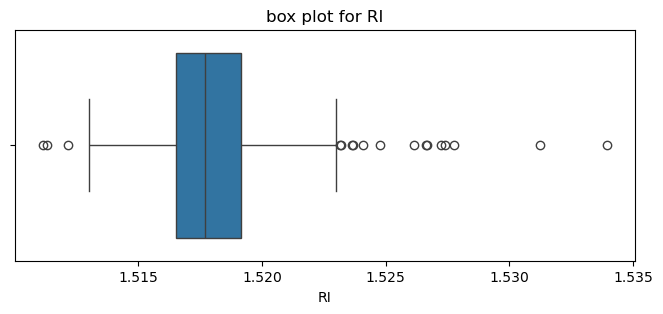

columm :  Na
No of outliers :  7
Outlier percentage :  3.271





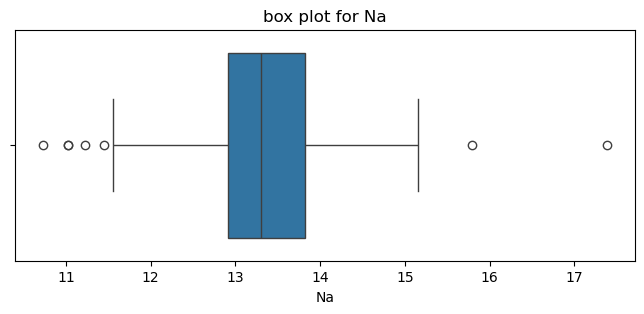

columm :  Mg
No of outliers :  0
Outlier percentage :  0.0





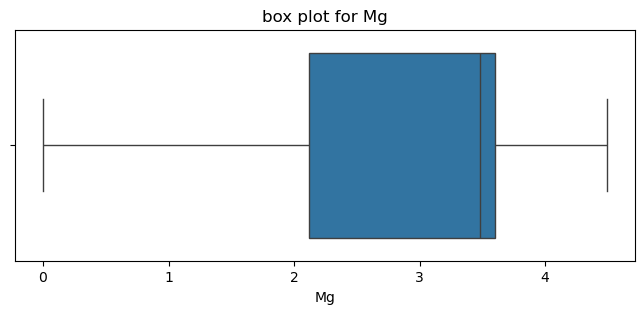

columm :  Al
No of outliers :  18
Outlier percentage :  8.411





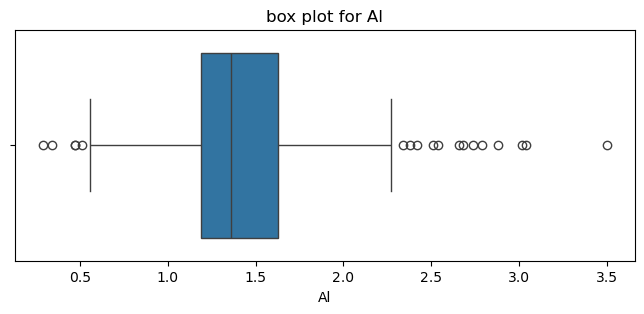

columm :  Si
No of outliers :  12
Outlier percentage :  5.607





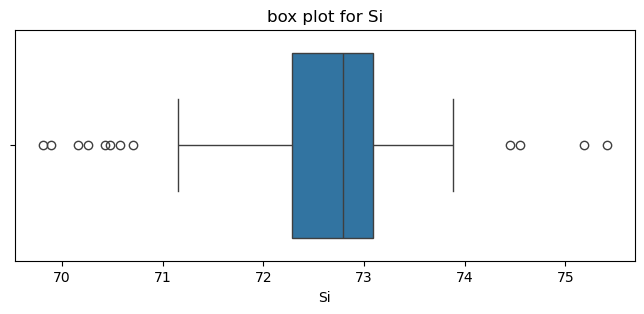

columm :  K
No of outliers :  7
Outlier percentage :  3.271





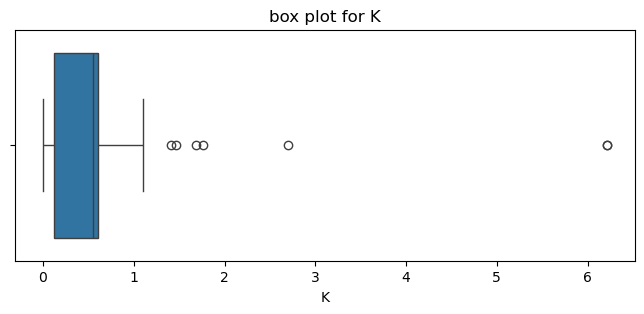

columm :  Ca
No of outliers :  26
Outlier percentage :  12.15





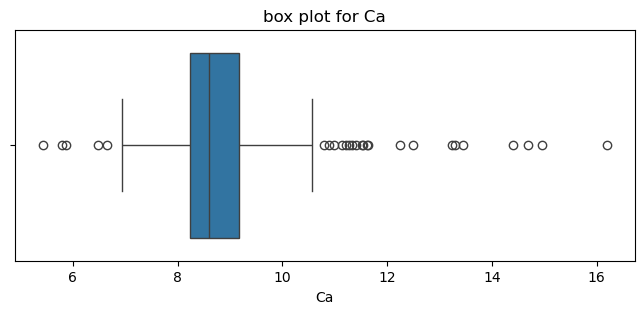

columm :  Ba
No of outliers :  38
Outlier percentage :  17.757





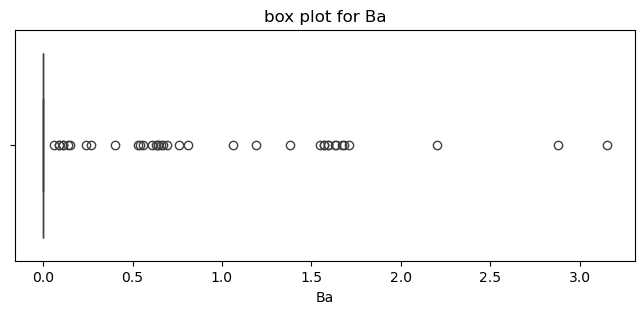

columm :  Fe
No of outliers :  12
Outlier percentage :  5.607





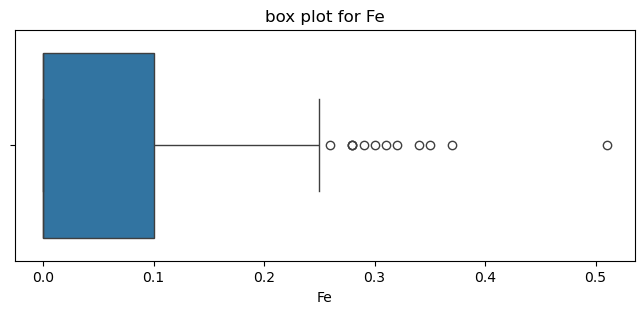

In [49]:
for col in num_columns:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    uwl = q3 + 1.5 * iqr
    lwl = q1 - 1.5 * iqr
    outliers = s[(s < lwl) | (s > uwl)]
    print("columm : ",col)
    print("No of outliers : ",len(outliers))
    percent=(len(outliers)/len(df))*100
    print("Outlier percentage : ",np.round(percent,3))
    print("\n\n")
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"box plot for {col}")
    plt.xlabel(col)
    plt.show()


# correlation and heatmap 

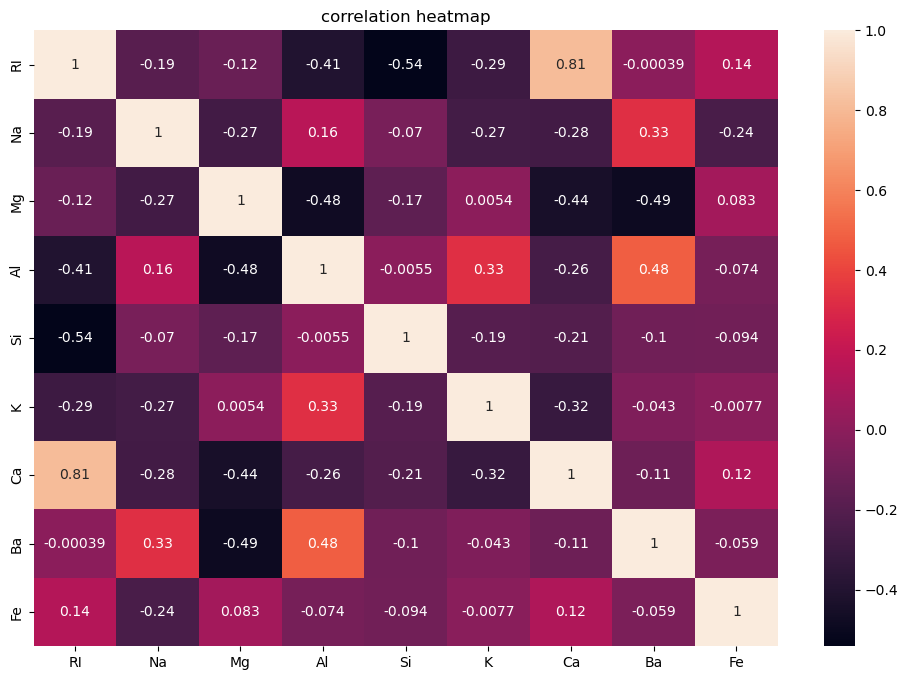

In [52]:
plt.figure(figsize=(12,8))
corr=df[num_columns].corr()
sns.heatmap(corr,annot=True)
plt.title("correlation heatmap")
plt.show()

### 3: Data Preprocessing ###

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [34]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

no missing values

In [35]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

all are in numeric format

no need to do feature scaling 

### 4: Random Forest Model Implementation ###

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


splitting the variables

In [61]:
X=df.drop(columns=['Type'])
Y=df['Type']

In [63]:
Y.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

training and testing split

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=20)

In [70]:
X_train.shape

(160, 9)

In [72]:
X_test.shape

(54, 9)

# Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

In [77]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [79]:
Y_pred_rf = random_forest.predict(X_test)
Y_pred_proba_rf =random_forest.predict_proba(X_test)

In [81]:
accuracy=accuracy_score(Y_test, Y_pred_rf)
logloss=log_loss(Y_test, Y_pred_proba_rf)
report=classification_report(Y_test, Y_pred_rf)
cm=confusion_matrix(Y_test, Y_pred_rf)

In [83]:
print("****** Random Forest ******")
print("Test Accuracy:", round(accuracy, 4))
print("Test Log Loss:", round(logloss, 4))
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)

****** Random Forest ******
Test Accuracy: 0.7778
Test Log Loss: 0.6024

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.72      0.76        18
           2       0.65      0.89      0.76        19
           3       1.00      0.50      0.67         4
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         8

    accuracy                           0.78        54
   macro avg       0.91      0.76      0.81        54
weighted avg       0.82      0.78      0.78        54

Confusion Matrix:
 [[13  5  0  0  0  0]
 [ 2 17  0  0  0  0]
 [ 1  1  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  2  0  0  0  6]]


accuracy is 77% 

log loss is 0.6024 which is good

overall performance is good mainly for type 1 and 2

### 5: Bagging and Boosting Methods ###
Apply the Bagging and Boosting methods and compare the results.

# Bagging 

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [94]:
Y_pred_bag=bagging.predict(X_test)
Y_pred_proba_bag=bagging.predict_proba(X_test)

In [96]:
accuracy=accuracy_score(Y_test, Y_pred_bag)
logloss=log_loss(Y_test, Y_pred_proba_bag)
report=classification_report(Y_test, Y_pred_bag)
cm=confusion_matrix(Y_test, Y_pred_bag)

In [98]:
print("******  Bagging  ******")
print("Test Accuracy:", round(accuracy, 4))
print("Test Log Loss:", round(logloss, 4))
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)

******  Bagging  ******
Test Accuracy: 0.8148
Test Log Loss: 0.635

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.72      0.76        18
           2       0.74      0.89      0.81        19
           3       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       0.89      1.00      0.94         8

    accuracy                           0.81        54
   macro avg       0.91      0.77      0.81        54
weighted avg       0.83      0.81      0.81        54

Confusion Matrix:
 [[13  5  0  0  0  0]
 [ 1 17  0  0  0  1]
 [ 2  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  8]]


comapared to random forest bagging is best with 81.5% accuarcy 

and log loss - 0.635 close to random forest

more balanced than random forest

# adaboost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
adaboost.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [105]:
Y_pred_ada = adaboost.predict(X_test)
Y_pred_proba_ada=adaboost.predict_proba(X_test)

In [107]:
accuracy=accuracy_score(Y_test, Y_pred_ada)
logloss=log_loss(Y_test, Y_pred_proba_ada)
report=classification_report(Y_test, Y_pred_ada)
cm=confusion_matrix(Y_test, Y_pred_ada)

In [109]:
print("******  AdaBoost  ******")
print("Test Accuracy:", round(accuracy, 4))
print("Test Log Loss:", round(logloss, 4))
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)

******  AdaBoost  ******
Test Accuracy: 0.5926
Test Log Loss: 1.3285

Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.89      0.67        18
           2       0.54      0.37      0.44        19
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.67      1.00      0.80         2
           7       0.88      0.88      0.88         8

    accuracy                           0.59        54
   macro avg       0.44      0.52      0.46        54
weighted avg       0.52      0.59      0.54        54

Confusion Matrix:
 [[16  2  0  0  0  0]
 [10  7  0  0  1  1]
 [ 4  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  7]]


worst adaboost when compared to both above 

log loss is 1.3285 which is very high

adaboost can overfit or underfit 

# gradient boosting

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
gboost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gboost.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [120]:
Y_pred_gb = gboost.predict(X_test)
Y_pred_proba_gb = gboost.predict_proba(X_test)

In [122]:
accuracy=accuracy_score(Y_test, Y_pred_gb)
logloss=log_loss(Y_test, Y_pred_proba_gb)
report=classification_report(Y_test, Y_pred_gb)
cm=confusion_matrix(Y_test, Y_pred_gb)

In [124]:
print("******  Gradient Boosting  ******")
print("Test Accuracy:", round(accuracy, 4))
print("Test Log Loss:", round(logloss, 4))
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)

******  Gradient Boosting  ******
Test Accuracy: 0.7222
Test Log Loss: 1.4739

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.67      0.75        18
           2       0.70      0.84      0.76        19
           3       0.50      0.75      0.60         4
           5       0.25      0.33      0.29         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         8

    accuracy                           0.72        54
   macro avg       0.72      0.64      0.65        54
weighted avg       0.77      0.72      0.73        54

Confusion Matrix:
 [[12  4  2  0  0  0]
 [ 1 16  0  2  0  0]
 [ 1  0  3  0  0  0]
 [ 0  1  1  1  0  0]
 [ 0  0  0  1  1  0]
 [ 0  2  0  0  0  6]]


ok accuaracy 

high log loss with 1.4739 

better than adaboost worst than random forest and bagging

Bagging methos is more suitable than boosting method for the given glass dataset 

## Additional Notes: ##

****1. Explain Bagging and Boosting methods. How is it different from each other.****

Bagging and boosting are ensemble methods that improve machine learning model accuracy by combining multiple models 

Bagging - trains models independently and in parallel to reduce variance

boosting - trains models sequentially to correct previous errors to reduce bias

****2. Explain how to handle imbalance in the data.****

by choossing proper evaluation metrics

resampling - oversampling and undersampling 

balancedbaggingclassifier


